# Agrupamento de noticias usando Kmeans

O K-means é um algoritmo do tipo não supervisionado, ou seja, que não trabalha com dados rotulados.

O objetivo dele é encontrar similaridades entre os dados e agrupá-los conforme o número de clusters.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

import seaborn as sb

%matplotlib inline

In [17]:
def corpus(data):
    #data["noticia"] = data.titulo + " " + data.subTitulo + " " + data.conteudo
    data["noticia"] = data.titulo
    docs = []

    for index, doc in data.iterrows():
        doc.noticia = doc.noticia.lower()
        docs.append(doc.noticia)

    return docs

Para nosso exemplo, vamos definir o corpos como sendo 2500 titulos de noticias, sobre politica.

In [18]:
data = pd.read_csv("estadao_noticias_eleicao.csv", encoding = "utf-8")[:2500]
data = data.replace(np.NAN, "")

Nessa parte cada titulo de noticia vai se transformar em um vetor de tamanho iguais, sendo o tamanho desse vetor, o número de palavras 
distintas no corpus. E o vetor será composto pelo tf-idf de cada palavra em relação a cada titulo de noticia.

In [19]:
corpus = corpus(data)

vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(corpus)

x = vector.toarray() #Caracteristicas

Feito isso, vamos utilizar o Kmeans para determinar possiveis agrupamentos entre essas noticias. Mas antes vamos estimar o numero de clusters utilizando o metodo de agrupamento elbow ou metodo do cotovelo.

Basicamente o que o método faz é testar a variância dos dados em relação ao número de clusters.

Este testa até o momento que conforme o número de clusters aumenta não representa um valor significativo de ganho.

Podemos ver esse “cotovelo” quando plotamos seus resultados em um gráfico.

A partir do valor indicado pelo “cotovelo” no gráfico significa que não existe ganho em relação ao aumento de clusters.

Nesse ponto, significa que o método encontrou o número ideal de clusters.

1 2270.9774780096104
2 2258.2174236023375
3 2245.976556177407
4 2236.064312256533
5 2227.3032342339848
6 2223.013998099917
7 2210.9994760673057
8 2210.2571701929446
9 2200.69076093973
10 2196.473359938814


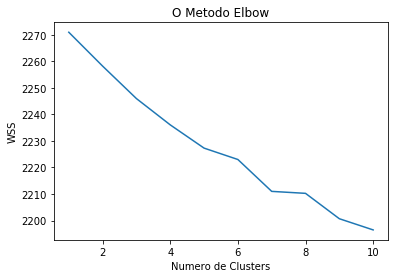

In [21]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(x)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

Podemos ver que a partir do 9 não vai existir ganho, então de 0 até 9, será 10, o número de clusters que o Kmeans usará.

Para vibializar a visualização desses agrupamentos graficamente, vamos transformar os vetores de n dimensões de cada titulo de noticia
em vetores de duas dimensões, onde cada vetor desse terá um rotulo, que será o número do grupo ao qual ele pertence.

In [22]:
from sklearn.manifold import TSNE
tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
random_state = 1
model = TSNE(n_components=2, random_state=random_state, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)


transformed_v = model.fit_transform(vector.toarray())

In [23]:
df = pd.DataFrame(transformed_v, index = [i for i in range(len(transformed_v))], columns = ['x', 'y'] )

In [24]:
df['k-labels'] = kmeans.labels_
df.head()

,x,y,k-labels
0,0.564660,4.726972,1
1,1.777766,2.209380,4
2,0.719578,1.448246,5
3,2.148599,3.413864,0
4,2.147055,3.410525,0


Agora vamos ver graficamento a separação desses grupos.

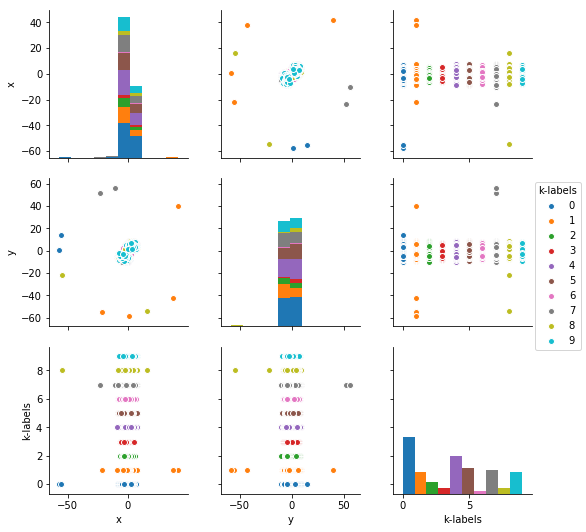

In [25]:
sb.pairplot(df,'k-labels')

Podemos ver que os grupos estão bem proximos, e faz sentido, uma vez que o corpus é uma base de dados com um unico topico especificamente sobre politica, mas vamos ver como fica o wordcloud e grafico de barras com a palavras mais frequentes de cada grupo, para tentar obsevar mais coisas a respeitos deles.

In [26]:
from wordcloud import WordCloud

In [27]:
g0 = ''
g1 = ''
g2 = ''
g3 = ''
g4 = ''
g5 = ''
g6 = ''
g7 = ''
g8 = ''
g9 = ''
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        g0 = g0 + ' ' + corpus[i]
    elif kmeans.labels_[i] == 1:
        g1 = g1 + ' ' + corpus[i]
    elif kmeans.labels_[i] == 2:
        g2 = g2 + ' ' + corpus[i]
    elif kmeans.labels_[i] == 3:
        g3 = g3 + ' ' + corpus[i]
    elif kmeans.labels_[i] == 4:
        g4 = g4 + ' ' + corpus[i]
    elif kmeans.labels_[i] == 5:
        g5 = g5 + ' ' + corpus[i]
    elif kmeans.labels_[i] == 6:
        g6 = g6 + ' ' + corpus[i]
    elif kmeans.labels_[i] == 7:
        g7 = g7 + ' ' + corpus[i]
    elif kmeans.labels_[i] == 8:
        g8 = g8 + ' ' + corpus[i]
    else:
        g9 = g9 + ' ' + corpus[i]

In [28]:
stopwords = stopwords.words('portuguese')

(-0.5, 399.5, 199.5, -0.5)

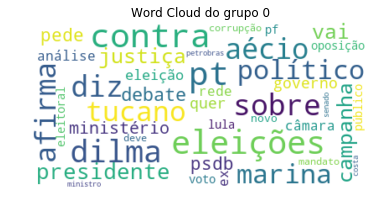

In [29]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=40, max_font_size=40).generate(g0)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud do grupo 0')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

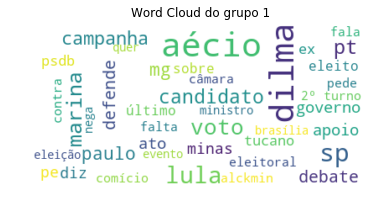

In [30]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=40, max_font_size=40).generate(g1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud do grupo 1')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

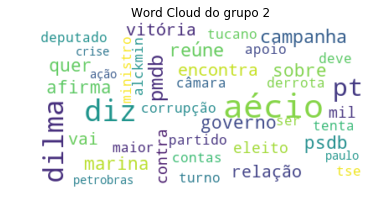

In [31]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=40, max_font_size=40).generate(g2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud do grupo 2')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

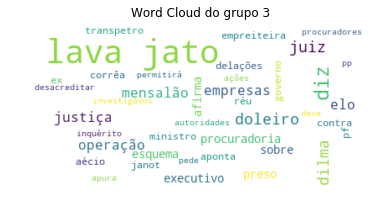

In [32]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=40, max_font_size=40).generate(g3)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud do grupo 3')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

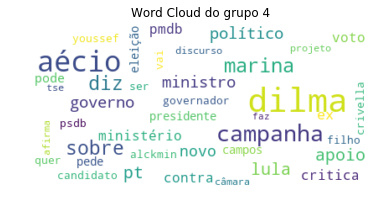

In [33]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=40, max_font_size=40).generate(g4)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud do grupo 4')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

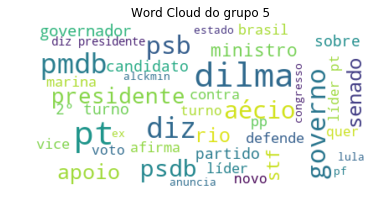

In [34]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=40, max_font_size=40).generate(g5)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud do grupo 5')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

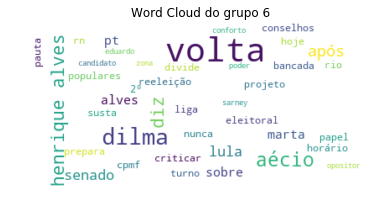

In [35]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=40, max_font_size=40).generate(g6)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud do grupo 6')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

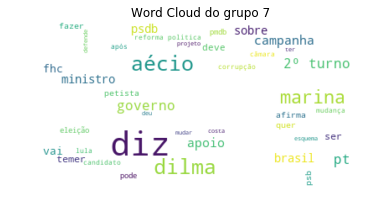

In [36]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=40, max_font_size=40).generate(g7)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud do grupo 7')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

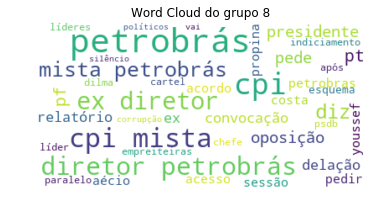

In [37]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=40, max_font_size=40).generate(g8)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud do grupo 8')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

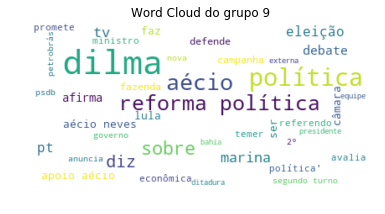

In [38]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=40, max_font_size=40).generate(g9)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud do grupo 9')
plt.axis("off")

In [40]:
from collections import Counter

w0 = [w for w in g0.split(' ')]
f_g0 = Counter(w0)

w1 = [w for w in g1.split(' ')]
f_g1 = Counter(w1)

w2 = [w for w in g2.split(' ')]
f_g2 = Counter(w2)
    
w3 = [w for w in g3.split(' ')]
f_g3 = Counter(w3)

w4 = [w for w in g4.split(' ')]
f_g4 = Counter(w4)

w5 = [w for w in g5.split(' ')]
f_g5 = Counter(w5)

w6 = [w for w in g6.split(' ')]
f_g6 = Counter(w6)

w7 = [w for w in g7.split(' ')]
f_g7 = Counter(w7)

w8 = [w for w in g8.split(' ')]
f_g8 = Counter(w8)

w9 = [w for w in g9.split(' ')]
f_g9 = Counter(w9)

del f_g0['']
del f_g1['']
del f_g2['']
del f_g3['']
del f_g4['']
del f_g5['']
del f_g6['']
del f_g7['']
del f_g8['']
del f_g9['']
for w in stopwords:
    del f_g0[w]
    del f_g1[w]
    del f_g2[w]
    del f_g3[w]
    del f_g4[w]
    del f_g5[w]
    del f_g6[w]
    del f_g7[w]
    del f_g8[w]
    del f_g9[w]

from operator import itemgetter
s0 = sorted(f_g0.items(), key=itemgetter(1), reverse = True)
s1 = sorted(f_g1.items(), key=itemgetter(1), reverse = True)
s2 = sorted(f_g2.items(), key=itemgetter(1), reverse = True)
s3 = sorted(f_g3.items(), key=itemgetter(1), reverse = True)
s4 = sorted(f_g4.items(), key=itemgetter(1), reverse = True)
s5 = sorted(f_g5.items(), key=itemgetter(1), reverse = True)
s6 = sorted(f_g6.items(), key=itemgetter(1), reverse = True)
s7 = sorted(f_g7.items(), key=itemgetter(1), reverse = True)
s8 = sorted(f_g8.items(), key=itemgetter(1), reverse = True)
s9 = sorted(f_g9.items(), key=itemgetter(1), reverse = True)

Agora vamos ver quais as 3 palavras mais frenquentes de cada grupo.

Text(0.5,1,'Palavras com a maior frequência no g0')

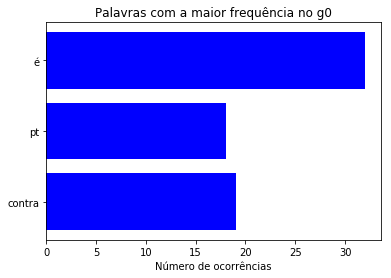

In [46]:
y0 = []
x0 = []
for i in s0[:3]:
    x0.append(i[0])
    y0.append(i[1])

plt.figure()
plt.barh(x0, y0, color="blue")
plt.xlabel("Número de ocorrências")
plt.title("Palavras com a maior frequência no g0" )

Text(0.5,1,'Palavras com a maior frequência no g1')

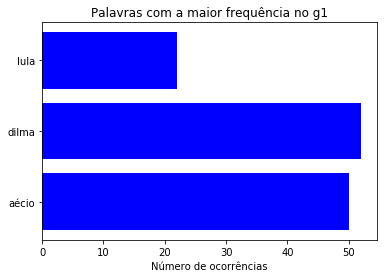

In [47]:
y1 = []
x1 = []
for i in s1[:3]:
    x1.append(i[0])
    y1.append(i[1])

plt.figure()
plt.barh(x1, y1, color="blue")
plt.xlabel("Número de ocorrências")
plt.title("Palavras com a maior frequência no g1" )

Text(0.5,1,'Palavras com a maior frequência no g2')

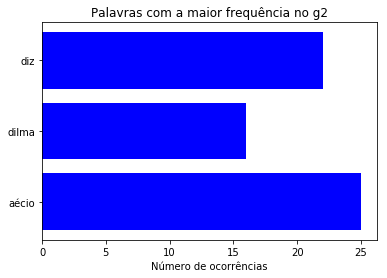

In [48]:
y2 = []
x2 = []
for i in s2[:3]:
    x2.append(i[0])
    y2.append(i[1])

plt.figure()
plt.barh(x2, y2, color="blue")
plt.xlabel("Número de ocorrências")
plt.title("Palavras com a maior frequência no g2" )

Text(0.5,1,'Palavras com a maior frequência no g3')

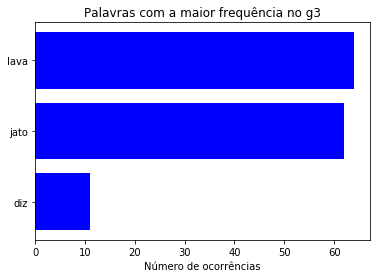

In [49]:
y3 = []
x3 = []
for i in s3[:3]:
    x3.append(i[0])
    y3.append(i[1])

plt.figure()
plt.barh(x3, y3, color="blue")
plt.xlabel("Número de ocorrências")
plt.title("Palavras com a maior frequência no g3" )

Text(0.5,1,'Palavras com a maior frequência no g4')

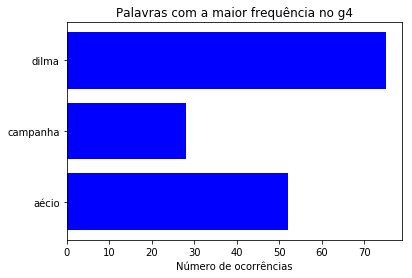

In [50]:
y4 = []
x4 = []
for i in s4[:3]:
    x4.append(i[0])
    y4.append(i[1])

plt.figure()
plt.barh(x4, y4, color="blue")
plt.xlabel("Número de ocorrências")
plt.title("Palavras com a maior frequência no g4" )

Text(0.5,1,'Palavras com a maior frequência no g5')

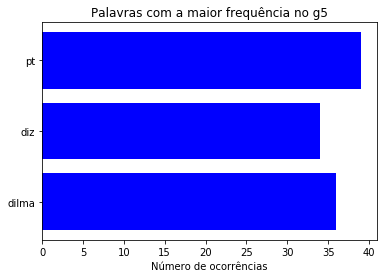

In [51]:
y5 = []
x5 = []
for i in s5[:3]:
    x5.append(i[0])
    y5.append(i[1])

plt.figure()
plt.barh(x5, y5, color="blue")
plt.xlabel("Número de ocorrências")
plt.title("Palavras com a maior frequência no g5" )

Text(0.5,1,'Palavras com a maior frequência no g6')

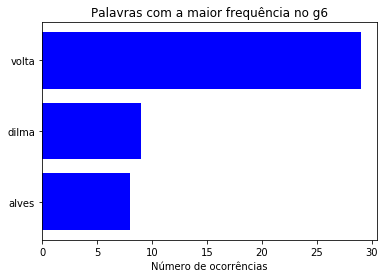

In [52]:
y6 = []
x6 = []
for i in s6[:3]:
    x6.append(i[0])
    y6.append(i[1])

plt.figure()
plt.barh(x6, y6, color="blue")
plt.xlabel("Número de ocorrências")
plt.title("Palavras com a maior frequência no g6" )

Text(0.5,1,'Palavras com a maior frequência no g7')

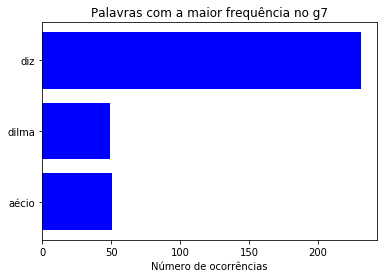

In [53]:
y7 = []
x7 = []
for i in s7[:3]:
    x7.append(i[0])
    y7.append(i[1])

plt.figure()
plt.barh(x7, y7, color="blue")
plt.xlabel("Número de ocorrências")
plt.title("Palavras com a maior frequência no g7" )

Text(0.5,1,'Palavras com a maior frequência no g8')

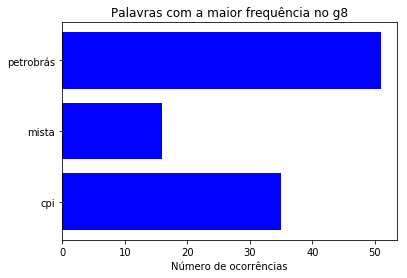

In [54]:
y8 = []
x8 = []
for i in s8[:3]:
    x8.append(i[0])
    y8.append(i[1])

plt.figure()
plt.barh(x8, y8, color="blue")
plt.xlabel("Número de ocorrências")
plt.title("Palavras com a maior frequência no g8" )

Text(0.5,1,'Palavras com a maior frequência no g9')

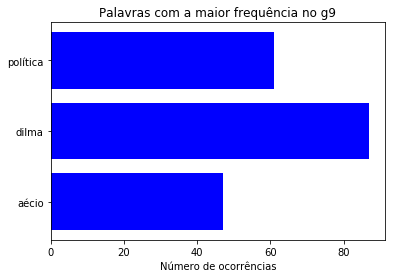

In [55]:
y9 = []
x9 = []
for i in s9[:3]:
    x9.append(i[0])
    y9.append(i[1])

plt.figure()
plt.barh(x9, y9, color="blue")
plt.xlabel("Número de ocorrências")
plt.title("Palavras com a maior frequência no g9" )

Algumas Observações:

Com o top 3 de palavras é bem facil ver os grupos que parecem ter pouca relação com os demais:

    Grupo 0: Sobre o PT
    Grupo 3: lava jato.
    Grupo 6: Dilma e o ex-ministro Henrique Alves
    Grupo 8: Petrobrás

Nos outros grupos, são muito relacionados a Dilma e Áecio. Mas se observar as wordclouds, veremos que são em contextos diferentes, que um top 3 de palavras não consegue capturar bem.

    Grupo 1: Foca nas candidaturas e apoios, Dilma e Áecio eram os principais, mas nomes como o de Marina também estão entre os mais frenquentes

    Grupo 2: Parece ter um foco maior em denuncias de corrupção, e nos apoios que ja foram concretizados

    Grupo 4: Parece incluir os possiveis ministros que seram nomeados e os discursos dos candidatos

    Grupo 5: Além do top 3, as palavras mais frequentes, são as siglas de partidos além do PT, PSBD, PSB, PMDB

    Grupo 7: Parece ter mais relação com o segundo turno das eleições

    Grupo 9: Debate sobre reforma politica